In this notebook I will perform some EDA on the "Where it pays to Attend College?" dataset, and try to identfiy any patterns

Since this is one of my first truly independent dataset analyses, some rookies mistakes are to be expected.

I will start by uploading a few of the more popular libraries, but will likely come back to update that list.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

from bokeh.plotting import figure, show
from bokeh.transform import jitter
from bokeh.io import output_notebook, reset_output, show
from bokeh.models import Circle, HoverTool, ColumnDataSource, FactorRange
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

from typing import List, Union

In [2]:
def replacer(string):
    
    """Replaces the characters ['%', '$', ',', '.'] with an empty space so that the object type columns get converter to floats
    
    Input Args: a string with one of the abovementioned characters
    Returns: a string ready to be converted to a float
    """
    
    for ch in ['%', '$', ',', '.']:
        string = string.map(lambda x: x.replace(ch, ''))
    return string

## Import the data

The data is storred in 3 seperate csv files.

In [3]:
# files inside data folder 
%ls /Users/LyubomirKushev/Desktop/Data\ Science/Kaggle/Where\ it\ pays\ to\ go\ to\ college/1189_2137_bundle_archive/

degrees-that-pay-back.csv     scatter.html
salaries-by-college-type.csv  styling_selections.html
salaries-by-region.csv


In [4]:
%cd /Users/LyubomirKushev/Desktop/Data\ Science/Kaggle/Where\ it\ pays\ to\ go\ to\ college/1189_2137_bundle_archive/

/Users/LyubomirKushev/Desktop/Data Science/Kaggle/Where it pays to go to college/1189_2137_bundle_archive


### Degrees that pay back

In [5]:
DEGREES = pd.read_csv("degrees-that-pay-back.csv")

In [6]:
DEGREES.columns = ['Majors', 'start_p50', 'mid_p50', 'delta_start_mid', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']
DEGREES.head()

,Majors,start_p50,mid_p50,delta_start_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [7]:
DEGREES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Majors             50 non-null object
start_p50          50 non-null object
mid_p50            50 non-null object
delta_start_mid    50 non-null float64
mid_p10            50 non-null object
mid_p25            50 non-null object
mid_p75            50 non-null object
mid_p90            50 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [8]:
cols = ['start_p50', 'mid_p50', 'mid_p10', 'mid_p25', 'mid_p75', 'mid_p90']

In [9]:
DEGREES[cols] = DEGREES[cols].apply(replacer) # apply the replaced
DEGREES[cols] = DEGREES[cols].astype('float64') # convert to float
DEGREES[cols] = DEGREES[cols]/100 # because the '.' is removed from the string

In [10]:
DEGREES.describe()

,start_p50,mid_p50,delta_start_mid,mid_p10,mid_p25,mid_p75,mid_p90
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


In [11]:
DEGREES['Majors'].describe()

count          50
unique         50
top       Geology
freq            1
Name: Majors, dtype: object

### Analysis - DEGREES

Let's have a look at which major experienced the biggest percentage change from "Starting" to "Mid-Career" Salary (Median).

In [12]:
DEGREES.sort_values(by = 'delta_start_mid', ascending=False, inplace=True)
DEGREES.head()

,Majors,start_p50,mid_p50,delta_start_mid,mid_p10,mid_p25,mid_p75,mid_p90
37,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0
42,Philosophy,39900.0,81200.0,103.5,35500.0,52800.0,127000.0,168000.0
33,International Relations,40900.0,80900.0,97.8,38200.0,56000.0,111000.0,157000.0
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
36,Marketing,40800.0,79600.0,95.1,42100.0,55600.0,119000.0,175000.0


In [13]:
DEGREES = DEGREES.reset_index()
DEGREES = DEGREES.sort_index(axis=0, ascending=False)
DEGREES.head()

,index,Majors,start_p50,mid_p50,delta_start_mid,mid_p10,mid_p25,mid_p75,mid_p90
49,43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
48,40,Nursing,54200.0,67000.0,23.6,47600.0,56400.0,80900.0,98300.0
47,41,Nutrition,39900.0,55300.0,38.6,33900.0,44500.0,70500.0,99200.0
46,32,Interior Design,36100.0,53200.0,47.4,35700.0,42600.0,72500.0,107000.0
45,18,Education,34900.0,52000.0,49.0,29300.0,37900.0,73400.0,102000.0


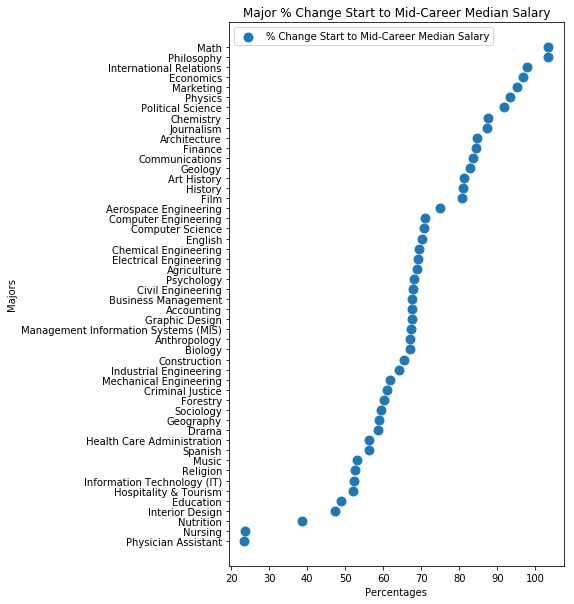

In [26]:
#fig = plt.figure(figsize=(8,10))
#ax = fig.add_subplot()

fig, ax = plt.subplots(figsize=(6,10))

x = DEGREES['delta_start_mid']
y = DEGREES.index
labels = DEGREES['Majors']

ax.scatter(x, y, label = '% Change Start to Mid-Career Median Salary', s = 80)
ax.grid(False)
plt.yticks(y, labels)
ax.invert_yaxis()

plt.xlabel('Percentages')
plt.ylabel('Majors')
plt.title('Major % Change Start to Mid-Career Median Salary')
plt.legend(loc='upper left')
plt.show()

In [27]:
output_notebook()

#bokeh factors must be strings
DEGREES['delta_start_mid_str'] = [str(x) for x in DEGREES.delta_start_mid]

#define the categorical range 
labels = DEGREES['Majors']
y_cat_range = FactorRange(factors=list(reversed(labels)))

plot = figure(plot_width=600, plot_height=900, y_range=y_cat_range, tools='pan, box_zoom, tap, box_select, lasso_select, wheel_zoom', title  ='Mid-Career to % Change')

#add source
DEGREES.sort_values(by='index', ascending=False, inplace=True)
source = ColumnDataSource(DEGREES)

#level_0 is the index column inside the "source"
plot.circle(x='delta_start_mid', y='Majors', size=10, color='navy', source=source,
                       #set visaul properties for selected glyphs
                        selection_color = 'navy',
                        
                        #set visual properties for non-selected glyphs
                       nonselection_fill_alpha = 0.2,
                       nonselection_fill_color = 'navy',
                       nonselection_line_color = 'purple',
                       nonselection_line_alpha = 0.5)

plot.xaxis.axis_label = '% Change'
plot.yaxis.axis_label = 'Majors'


#add labels and values to the HoverTool
plot.add_tools(HoverTool(tooltips=[('Majors', '@Majors'),('Starting Median', '@start_p50'),('% Change Start-Mid','@delta_start_mid_str'),('Mid-Career Median', '@mid_p50')]))


show(plot)

Loading BokehJS ...

By looking at the above graphs we can see that Maths and Philosophy are the Majors whihe hich have tgherst percentage change between 'Starting Median Salary' and 'Mid-Career Median Salary'.

In [ ]:
output_notebook()

#bokeh factors must be strings
DEGREES['delta_start_mid_str'] = [str(x) for x in DEGREES.delta_start_mid]

#define the categorical range 
labels = DEGREES['Majors']
y_cat_range = FactorRange(factors=list(reversed(labels)))

plot = figure(plot_width=600, plot_height=900, y_range=y_cat_range, tools='pan, box_zoom, tap, box_select, lasso_select, wheel_zoom', title  ='Mid-Career to % Change')

#add source
DEGREES.sort_values(by='index', ascending=False, inplace=True)
source = ColumnDataSource(DEGREES)

#level_0 is the index column inside the "source"
plot.circle(x='delta_start_mid', y='Majors', size=10, color='navy', source=source,
                       #set visaul properties for selected glyphs
                        selection_color = 'navy',
                        
                        #set visual properties for non-selected glyphs
                       nonselection_fill_alpha = 0.2,
                       nonselection_fill_color = 'navy',
                       nonselection_line_color = 'purple',
                       nonselection_line_alpha = 0.5)

plot.xaxis.axis_label = '% Change'
plot.yaxis.axis_label = 'Majors'


#add labels and values to the HoverTool
plot.add_tools(HoverTool(tooltips=[('Majors', '@Majors'),('Starting Median', '@start_p50'),('% Change Start-Mid','@delta_start_mid_str'),('Mid-Career Median', '@mid_p50')]))


show(plot)

### Types that pay back

In [19]:
TYPE = pd.read_csv("salaries-by-college-type.csv")

In [20]:
TYPE.head(15)

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN
5,Worcester Polytechnic Institute (WPI),Engineering,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00"
6,Carnegie Mellon University (CMU),Engineering,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00"
7,Rensselaer Polytechnic Institute (RPI),Engineering,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00"
8,Georgia Institute of Technology,Engineering,"$58,300.00","$106,000.00","$67,200.00","$85,200.00","$137,000.00","$183,000.00"
9,Colorado School of Mines,Engineering,"$58,100.00","$106,000.00","$62,200.00","$87,900.00","$142,000.00","$201,000.00"


In [21]:
salary_cols = ['Starting Median Salary','Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']

In [22]:
TYPE[salary_cols] = TYPE[salary_cols].fillna('0')
TYPE[salary_cols] = TYPE[salary_cols].apply(replacer)
TYPE[salary_cols] = TYPE[salary_cols].astype('float64')
TYPE[salary_cols] = TYPE[salary_cols]/100
TYPE['Percent change from start to mid per college type'] = ((TYPE['Mid-Career Median Salary'] - TYPE['Starting Median Salary'])/TYPE['Starting Median Salary'])*100
TYPE.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per college type
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,74.515235
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,0.0,104000.0,161000.0,0.0,62.913907
2,Harvey Mudd College,Engineering,71800.0,122000.0,0.0,96000.0,180000.0,0.0,69.916435
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,82.692308
4,Cooper Union,Engineering,62200.0,114000.0,0.0,80200.0,142000.0,0.0,83.279743


In [23]:
TYPE.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per college type
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,46068.401487,83932.342007,37999.628253,60373.234201,116275.092937,135427.509294,81.830374
std,6412.616242,14336.191107,17426.240075,11381.348857,22952.334054,63789.092095,14.563322
min,34800.000000,43900.000000,0.000000,31800.000000,60900.000000,0.000000,24.362606
25%,42000.000000,74000.000000,36600.000000,53200.000000,100000.000000,126000.000000,73.160173
50%,44700.000000,81600.000000,41600.000000,58400.000000,113000.000000,148000.000000,81.663516
75%,48300.000000,92200.000000,46400.000000,65100.000000,126000.000000,165000.000000,89.270386
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000,131.034483


In [24]:
display(TYPE['School Type'].describe())
TYPE['School Type'].unique()

count       269
unique        5
top       State
freq        175
Name: School Type, dtype: object

array(['Engineering', 'Party', 'Liberal Arts', 'Ivy League', 'State'],
      dtype=object)

In [25]:
TYPE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 9 columns):
School Name                                          269 non-null object
School Type                                          269 non-null object
Starting Median Salary                               269 non-null float64
Mid-Career Median Salary                             269 non-null float64
Mid-Career 10th Percentile Salary                    269 non-null float64
Mid-Career 25th Percentile Salary                    269 non-null float64
Mid-Career 75th Percentile Salary                    269 non-null float64
Mid-Career 90th Percentile Salary                    269 non-null float64
Percent change from start to mid per college type    269 non-null float64
dtypes: float64(7), object(2)
memory usage: 19.0+ KB


### Regions that pay back

In [26]:
REGION = pd.read_csv("salaries-by-region.csv")

In [27]:
REGION.head(15)

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN
5,Cal Poly San Luis Obispo,California,"$57,200.00","$101,000.00","$55,000.00","$74,700.00","$133,000.00","$178,000.00"
6,University of California at Los Angeles (UCLA),California,"$52,600.00","$101,000.00","$51,300.00","$72,500.00","$139,000.00","$193,000.00"
7,"University of California, San Diego (UCSD)",California,"$51,100.00","$101,000.00","$51,700.00","$75,400.00","$131,000.00","$177,000.00"
8,Pomona College,California,"$48,600.00","$101,000.00",NaN,"$63,300.00","$161,000.00",NaN
9,University of Southern California (USC),California,"$54,800.00","$99,600.00","$49,700.00","$73,800.00","$140,000.00","$201,000.00"


In [28]:
REGION.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null object
Mid-Career Median Salary             320 non-null object
Mid-Career 10th Percentile Salary    273 non-null object
Mid-Career 25th Percentile Salary    320 non-null object
Mid-Career 75th Percentile Salary    320 non-null object
Mid-Career 90th Percentile Salary    273 non-null object
dtypes: object(8)
memory usage: 20.1+ KB


In [29]:
region_cols = ['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary','Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']

In [30]:
REGION[region_cols] = REGION[region_cols].fillna('0')
REGION[region_cols] = REGION[region_cols].apply(replacer)
REGION[region_cols] = REGION[region_cols].astype('float64')
REGION[region_cols] = REGION[region_cols]/100
REGION['Percent change from start to mid per region'] = ((REGION['Mid-Career Median Salary'] - REGION['Starting Median Salary'])/REGION['Starting Median Salary'])*100
REGION.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per region
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,83.238636
1,California Institute of Technology (CIT),California,75500.0,123000.0,0.0,104000.0,161000.0,0.0,62.913907
2,Harvey Mudd College,California,71800.0,122000.0,0.0,96000.0,180000.0,0.0,69.916435
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,86.978297
4,Occidental College,California,51900.0,105000.0,0.0,54800.0,157000.0,0.0,102.312139


In [31]:
REGION.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per region
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000
mean,46253.437500,83934.375000,38606.562500,60614.062500,116496.875000,136877.18750,80.989461
std,6617.038001,15191.443091,17886.421201,11786.436432,24104.265214,66252.79703,16.216647
min,34500.000000,43900.000000,0.000000,31800.000000,60900.000000,0.00000,17.380353
25%,42000.000000,73725.000000,37200.000000,53100.000000,99825.000000,125750.00000,71.842122
50%,45100.000000,82700.000000,42450.000000,59400.000000,113000.000000,149000.00000,81.181138
75%,48900.000000,93250.000000,47925.000000,66025.000000,129000.000000,171000.00000,90.116476
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.00000,131.034483


### Analysis

In [32]:
start_v_mid_type = TYPE.groupby(['School Type'])[['Starting Median Salary', 'Mid-Career Median Salary']].mean()
start_v_mid_type['Percent change from start to mid per college type'] = ((start_v_mid_type['Mid-Career Median Salary'] - start_v_mid_type['Starting Median Salary'])/start_v_mid_type['Starting Median Salary'])*100
start_v_mid_type

,Starting Median Salary,Mid-Career Median Salary,Percent change from start to mid per college type
School Type,,,
Engineering,59057.894737,103842.105263,75.831031
Ivy League,60475.000000,120125.000000,98.635800
Liberal Arts,45746.808511,89378.723404,95.376959
Party,45715.000000,84685.000000,85.245543
State,44126.285714,78567.428571,78.051307


In [33]:
start_v_mid_region = REGION.groupby(['Region'])[['Starting Median Salary', 'Mid-Career Median Salary']].mean()
start_v_mid_region['Percent change from start to mid per college type'] = ((start_v_mid_region['Mid-Career Median Salary'] - start_v_mid_region['Starting Median Salary'])/start_v_mid_region['Starting Median Salary'])*100
start_v_mid_region.head()

,Starting Median Salary,Mid-Career Median Salary,Percent change from start to mid per college type
Region,,,
California,51032.142857,93132.142857,82.497026
Midwestern,44225.352113,78180.281690,76.777070
Northeastern,48496.000000,91352.000000,88.370175
Southern,44521.518987,79505.063291,78.576709
Western,44414.285714,78200.000000,76.069476


In [34]:
display(DEGREES.head())
display(TYPE.head())
display(REGION.head())

,index,Majors,start_p50,mid_p50,delta_start_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,37,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0
1,42,Philosophy,39900.0,81200.0,103.5,35500.0,52800.0,127000.0,168000.0
2,33,International Relations,40900.0,80900.0,97.8,38200.0,56000.0,111000.0,157000.0
3,17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
4,36,Marketing,40800.0,79600.0,95.1,42100.0,55600.0,119000.0,175000.0


,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per college type
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,74.515235
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,0.0,104000.0,161000.0,0.0,62.913907
2,Harvey Mudd College,Engineering,71800.0,122000.0,0.0,96000.0,180000.0,0.0,69.916435
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,82.692308
4,Cooper Union,Engineering,62200.0,114000.0,0.0,80200.0,142000.0,0.0,83.279743


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Percent change from start to mid per region
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,83.238636
1,California Institute of Technology (CIT),California,75500.0,123000.0,0.0,104000.0,161000.0,0.0,62.913907
2,Harvey Mudd College,California,71800.0,122000.0,0.0,96000.0,180000.0,0.0,69.916435
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,86.978297
4,Occidental College,California,51900.0,105000.0,0.0,54800.0,157000.0,0.0,102.312139


In [35]:
def bin_perc(series: pd.Series) -> pd.Series:
    percent_labels = [f"[{i}, {i+10})" for i in range(0,110,10)]
    
    percent_bins = pd.IntervalIndex.from_tuples(
        [(i, i+10) for i in range(0,10,10)],
        closed="left"
    )
    
    percent_binned = pd.cut(
        series,
        percent_bins,
        labels = percent_labels,
        precision=2,
        include_lowest=True
    )
    
    percent_binned.sort_values(ascending=True, inplace=True)
    
    percent_binned = percent_binned.astype('str')
    
    return percent_binned

In [36]:
sns.set_style('whitegrid')

DEGREES['Percent change from Starting to Mid-Career Salary'].plot(kind='hist', bins=10, figsize=(8,8))

KeyError: 'Percent change from Starting to Mid-Career Salary'

In [37]:
DEGREES['quantile_ex_1'] = pd.cut(DEGREES['Percent change from Starting to Mid-Career Salary'],bins=10)
DEGREES = DEGREES.drop(columns=['quantile_ex_2'])

KeyError: 'Percent change from Starting to Mid-Career Salary'

In [38]:
DEGREES.head()

,index,Majors,start_p50,mid_p50,delta_start_mid,mid_p10,mid_p25,mid_p75,mid_p90
0,37,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0
1,42,Philosophy,39900.0,81200.0,103.5,35500.0,52800.0,127000.0,168000.0
2,33,International Relations,40900.0,80900.0,97.8,38200.0,56000.0,111000.0,157000.0
3,17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
4,36,Marketing,40800.0,79600.0,95.1,42100.0,55600.0,119000.0,175000.0


In [39]:
DEGREES['quantile_ex_1'].value_counts().plot(kind='bar')

KeyError: 'quantile_ex_1'